# Augmentation 패키지 
## Keras ImageDataGenerator
- 매우 쉽게 Augmentation 수행
- 임의로 적용되기 때문에 각 기능별로 변확 확률 정할 수 없음. 

## Augmentation 전용 패키지 (Albumentations, ImgAug)
- 매우 다양한 유형의 augmentation 기법 제공
- 일련의 augmentation들의 적용 확률 제공
- 쉽고 편리한 적용
- Object Detection, Segmentation에도 사용 가능
- Keras Pipeline Integration을 위한 별도의 작업 필요

## Tensorflow Image Library
- 다양한 Image API 기능 제공하며 augmentation 기능 제공
- 빠른 수행 속도
- Keras Layer와 결합되면 GPU 사용 가능
- 다양한 augmentation 기능 부족



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
!ls -lia

--2022-01-19 12:26:16--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.004s  

2022-01-19 12:26:16 (15.9 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]

total 80
1966133 drwxr-xr-x 1 root root  4096 Jan 19 12:26 .
6820816 drwxr-xr-x 1 root root  4096 Jan 19 12:24 ..
7208962 -rw-r--r-- 1 root root 61745 Mar 31  2020 033120_HT_covid-cat_feat-1028x579.jpg
4063259 drwxr-xr-x 4 root root  4096 Jan  7 14:33 .config
1966134 drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data


(579, 1028, 3)


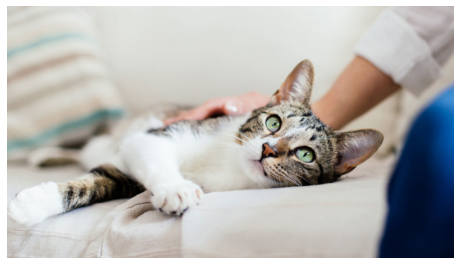

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

org_image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    
show_image(org_image)
print(org_image.shape)

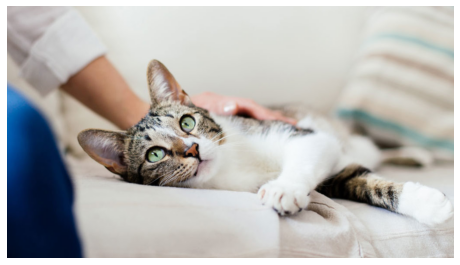

In [4]:
import albumentations as A

augmentor = A.HorizontalFlip(p=0.5) # p는 확률
aug_img = augmentor(image=org_image)['image'] # 반환하는 것은 딕셔너리이므로 ['image'] 키 값을 넣어야 한다. 
show_image(aug_img)

In [5]:
aug_img

array([[[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [194, 205, 201],
        [193, 204, 200],
        [192, 203, 199]],

       [[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [195, 204, 201],
        [194, 205, 201],
        [193, 204, 200]],

       [[187, 178, 179],
        [187, 178, 179],
        [187, 178, 179],
        ...,
        [197, 206, 203],
        [196, 205, 202],
        [194, 205, 201]],

       ...,

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [182, 173, 168],
        [196, 189, 183],
        [193, 186, 180]],

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [179, 170, 165],
        [189, 182, 176],
        [184, 177, 171]],

       [[  2,   9,  28],
        [  2,   9,  28],
        [  2,   9,  28],
        ...,
        [193, 184, 179],
        [198, 191, 185],
        [189, 182, 176]]

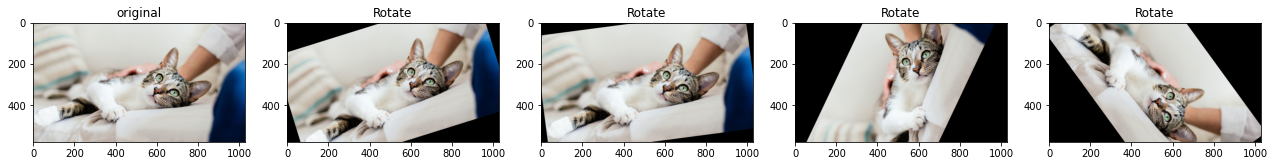

In [6]:
# 여러개의 이미지를 subplots로 시각화
def show_images(images, labels, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

# augmentor로 입력된 albumentations augmentation을 반복 수행
def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
    image_list = [org_image]
    label_list = ['original']
    
    for i in range(count):
        aug_image = augmentor(image=org_image)['image']
        image_list.append(aug_image)
        label_list.append(label)
              
    show_images(image_list, label_list, ncols=count+1)
    
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_CONSTANT)
#aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

### Augmentation 적용 확률 적용 및 HorizontalFlip과 VerticalFlip 📕
* p 인자를 통해 해당 augmentation을 적용할지, 원본 image를 그대로 유지할 지의 확률 설정. 
* HorizontalFlip은 좌우 반전, VerticalFlip은 상하 반전

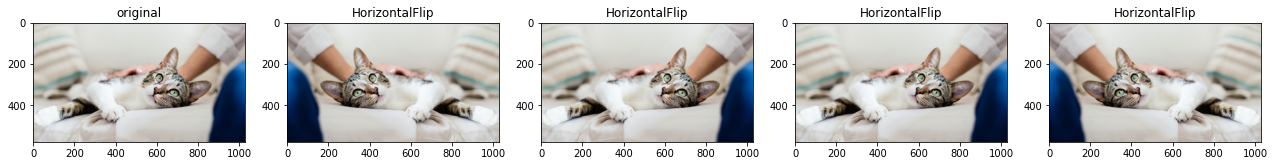

In [7]:
import albumentations as A

augmentor = A.HorizontalFlip(p=0.5)
aug_image = augmentor(image=org_image)['image']

repeat_aug(count=4, org_image=org_image, label='HorizontalFlip', augmentor=augmentor)

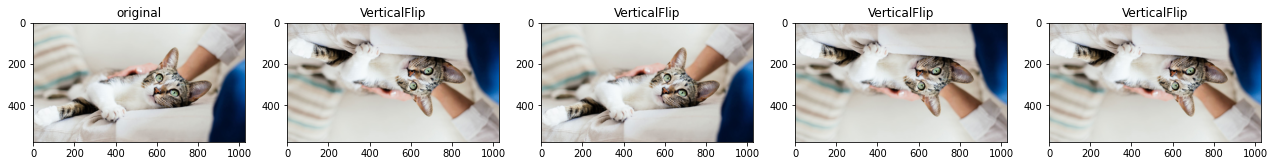

In [8]:
import albumentations as A

augmentor = A.VerticalFlip(p=0.5)
repeat_aug(count=4, org_image=org_image, label='VerticalFlip', augmentor=augmentor)

### Rotation
* 임의 각도로 회전 시키는 Rotate와 임의 90도 각도(90도 간격 회전 90, 180, 270도)로 회전시키는 RandomRotate90


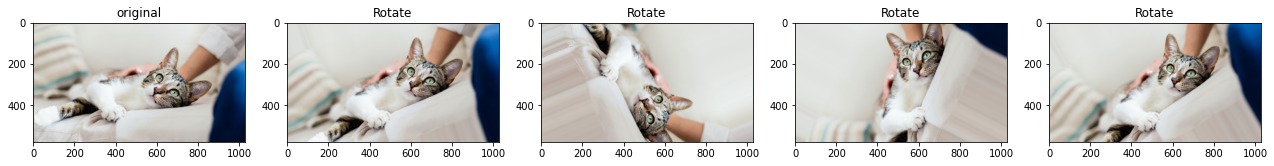

In [9]:
# 임의 각도로 회전. 최대 -90 ~ 90도. 회전으로 원본 이미지 대비 남는 영역은 검은색으로 대체
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE) #BORDER_REPLICATE : 변환되었을 때 빈 공간을 주변 픽셀값으로 복제해서 채워라. 
repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

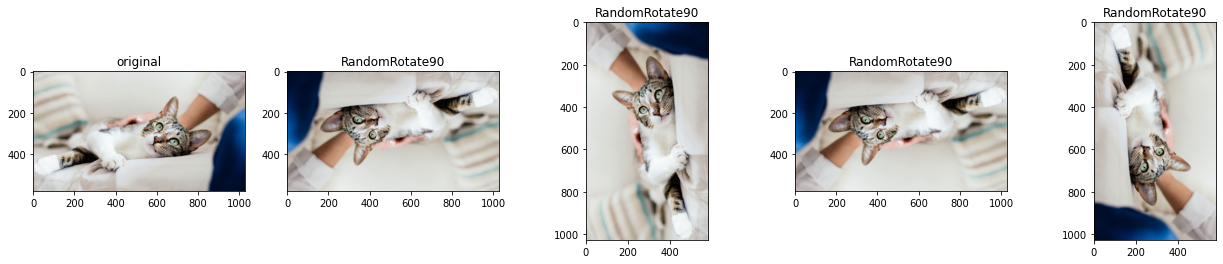

In [10]:
augmentor = A.RandomRotate90(p=1)
repeat_aug(count=4, org_image=org_image, label='RandomRotate90', augmentor=augmentor) # 가로, 세로 이미지 크기가 바뀌므로 주의! 

### ShiftScaleRotation 📕
* shift와 scale(zoom), rotate를 함께 또는 별개로 적용 가능. shift_limit, scale_limit, rotate_limit값으로 조정. 
* scale만 적용하려면 shift_limit와 rotate_limt를 0으로 설정. 마찬가지로 shift 또는 rotate만 적용 가능

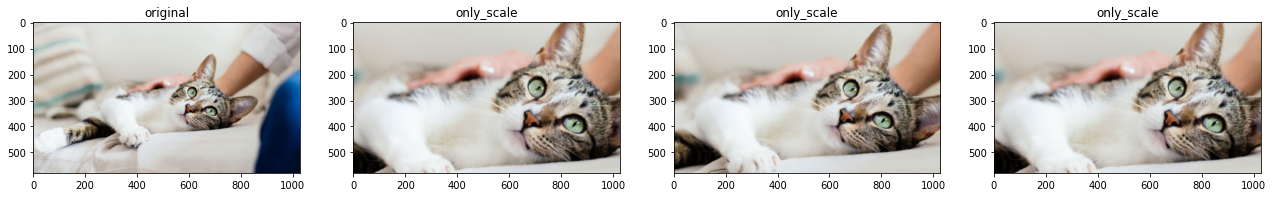

In [11]:
# shift와 rotate을 0으로 설정하면 scale 적용 (즉, 줌만 적용 된다). scale을 0.5 ~ 1.0으로 설정. 
augmentor = A.ShiftScaleRotate (shift_limit=0, scale_limit=(0.5, 1.0), rotate_limit=0, p=1)
repeat_aug(count=3, org_image=org_image, label='only_scale', augmentor=augmentor)

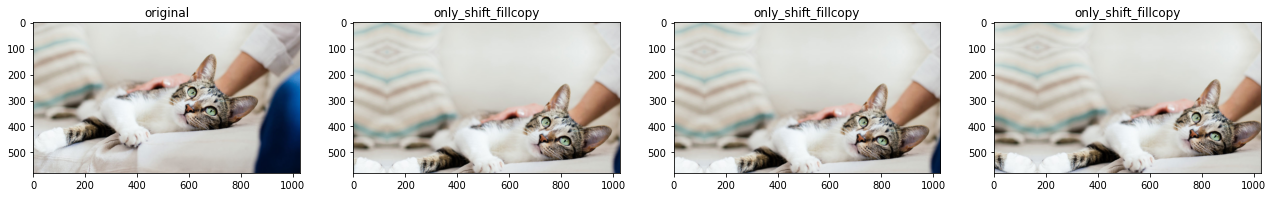

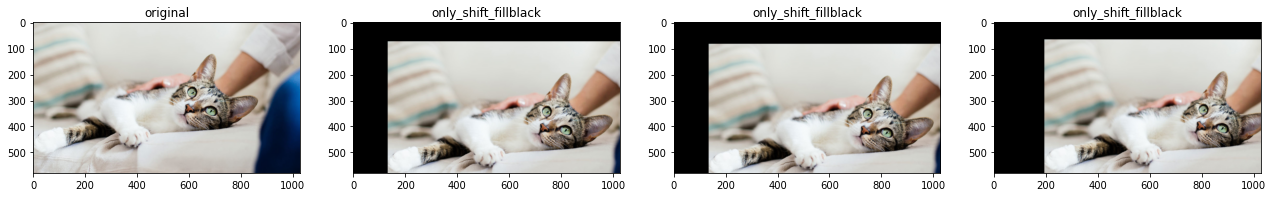

In [12]:
# 이동 후 남게 되는 Border를 Near 영역이미지로 복사
augmentor = A.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillcopy', augmentor=augmentor)

# 이동 후 남게 되는 border를 검은색으로 fill
augmentor = A.ShiftScaleRotate (shift_limit=(0.2, 0.1), scale_limit=0, 
                                rotate_limit=0, border_mode=cv2.BORDER_CONSTANT, p=1)
repeat_aug(count=3, org_image=org_image, label='only_shift_fillblack', augmentor=augmentor)


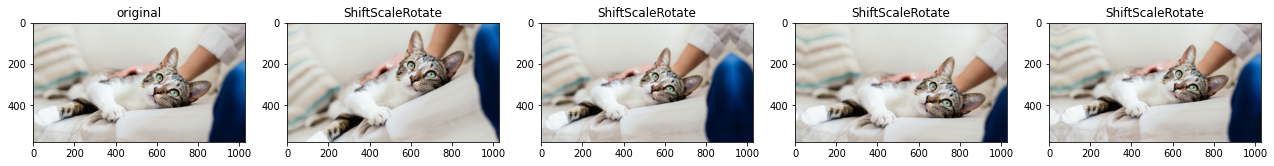

In [13]:
# Shift, Scale, Rotate를 한꺼번에 적용. 
augmentor = A.ShiftScaleRotate (p=1)
repeat_aug(count=4, org_image=org_image, label='ShiftScaleRotate', augmentor=augmentor)